In [2]:
import livecell_tracker.sample_data
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from napari.layers import Shapes

Import sample dataset

In [3]:
dic_dataset_path = Path("../datasets/test_data_STAV-A549/DIC_data")
mask_dataset_path = Path("../datasets/test_data_STAV-A549/mask_data")
dic_dataset, mask_dataset = livecell_tracker.sample_data.tutorial_three_image_sys(dic_dataset_path, mask_dataset_path, dir="../datasets")

|-----> Downloading data to ../datasets\test_data_STAV-A549.zip
|-----> Data already exists at ../datasets\test_data_STAV-A549.zip
|-----> Extracting data to ../datasets
3 png img file paths loaded;
3 tif img file paths loaded;


In [4]:
from livecell_tracker.core.io_sc import prep_scs_from_mask_dataset
single_cells = prep_scs_from_mask_dataset(mask_dataset, dic_dataset)

100%|██████████| 3/3 [00:07<00:00,  2.33s/it]


In [8]:
from typing import List
from livecell_tracker.track.sort_tracker_utils import (
    gen_SORT_detections_input_from_contours,
    update_traj_collection_by_SORT_tracker_detection,
    track_SORT_bbox_from_contours,
    track_SORT_bbox_from_scs
)


traj_collection = track_SORT_bbox_from_scs(single_cells, dic_dataset, mask_dataset=mask_dataset, max_age=1, min_hits=1)

In [9]:
trajectory = traj_collection.get_all_trajectories()[0]

Create napari viewer using displayer to display the atrributes

In [5]:
import napari
from livecell_tracker.core.sc_seg_operator import ScSegOperator, create_sc_seg_napari_ui
viewer = napari.view_image(dic_dataset.to_dask(), name="dic_image", cache=True)

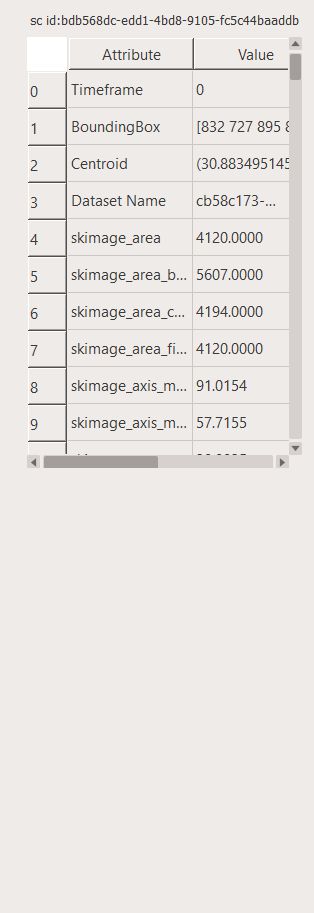

In [6]:
from livecell_tracker.core.displayer import Displayer, ScDisplayer, SctDisplayer, create_sc_displayer_napari_ui, create_sct_displayer_napari_ui, create_sctc_displayer_napari_ui

sample_sc = single_cells[10]
# sample_sc_displayer = ScDisplayer(sample_sc, trajectory, viewer=viewer)
# create_sc_displayer_napari_ui(sample_sc_displayer, traj_collection)
sc_displayer = ScDisplayer(sc=sample_sc, viewer=viewer)
create_sc_displayer_napari_ui(sc_displayer)

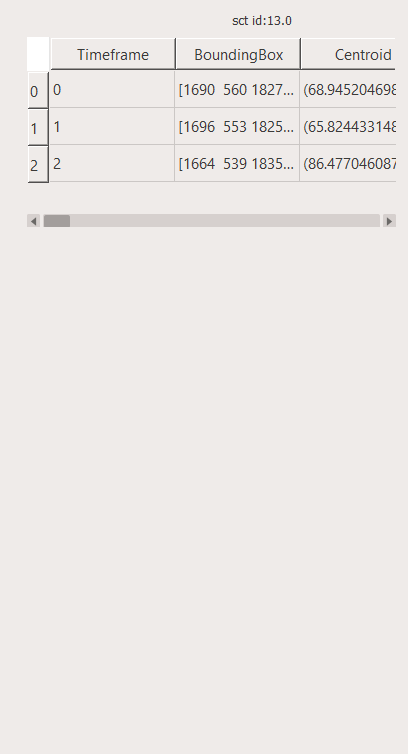

In [10]:
# Create the SctDisplayer
sct_displayer = SctDisplayer(trajectory=trajectory, viewer=viewer)
# Generate the napari UI for Sct
create_sct_displayer_napari_ui(sct_displayer)

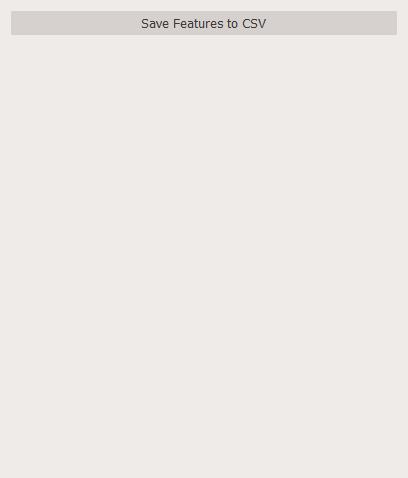

In [11]:
# Create the generic Displayer for Sctc
sctc_displayer = Displayer(viewer=viewer)
# Generate the napari UI for Sctc
create_sctc_displayer_napari_ui(sctc_displayer, sctc=traj_collection)